In [1]:
import sys
import pandas as pd
import os
import plotly.express as px

from config import config
from preprocessing.data_handling import load_data, save_data

In [2]:
df_raw = load_data(filepath=config.DATASETPATH)

Data loaded


In [3]:
# selecionando colunas
df_reviews = df_raw[['review_score', 'review_comment_message']].copy()

print('nulos', df_reviews.isna().sum())

# dropando nulos e resetando o index
df_reviews = (
    df_reviews.dropna(subset=['review_comment_message'])
    .reset_index(drop=True)
    )

print()
print(df_reviews.shape)
display(df_reviews)

nulos review_score              0
review_comment_message    0
dtype: int64

(40977, 2)


,review_score,review_comment_message
0,5,Recebi bem antes do prazo estipulado.
1,5,Parabéns lojas lannister adorei comprar pela I...
2,4,aparelho eficiente. no site a marca do aparelh...
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,"Vendedor confiável, produto ok e entrega antes..."
...,...,...
40972,4,para este produto recebi de acordo com a compr...
40973,5,Entregou dentro do prazo. O produto chegou em ...
40974,3,"O produto não foi enviado com NF, não existe v..."
40975,5,"Excelente mochila, entrega super rápida. Super..."


In [4]:
classification = lambda x: 1 if x > 3 else 0
df_reviews['review_target'] = df_reviews['review_score'].apply(classification)
df_reviews

,review_score,review_comment_message,review_target
0,5,Recebi bem antes do prazo estipulado.,1
1,5,Parabéns lojas lannister adorei comprar pela I...,1
2,4,aparelho eficiente. no site a marca do aparelh...,1
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",1
4,5,"Vendedor confiável, produto ok e entrega antes...",1
...,...,...,...
40972,4,para este produto recebi de acordo com a compr...,1
40973,5,Entregou dentro do prazo. O produto chegou em ...,1
40974,3,"O produto não foi enviado com NF, não existe v...",0
40975,5,"Excelente mochila, entrega super rápida. Super...",1


In [5]:
df_reviews['review_score'].value_counts(normalize=True).to_frame().reset_index()

,review_score,proportion
0,5,0.501598
1,1,0.213412
2,4,0.145838
3,3,0.086805
4,2,0.052346


In [6]:
df_reviews['review_target'].value_counts(normalize=True).to_frame().reset_index()

,review_target,proportion
0,1,0.647436
1,0,0.352564


In [7]:
px.bar(
    df_reviews['review_score'].value_counts(normalize=True).to_frame().reset_index()
    , y='proportion'
    , text_auto='.1%'
).show()

In [8]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def test_func(df, func, N=3):
    for _ in range(N):
        print('Antes:')
        print(df['review_comment_message'].iloc[_])
        print()
        print('Depois:')
        print(func(df['review_comment_message'].iloc[_]))
        print('-'*100)

In [10]:
import string
df_tests = df_reviews.loc[:5,:]
def clean_text(text):
    text = text.lower()  # Converter para minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remover pontuações
    text = ' '.join([word for word in text.split() if not any(c.isdigit() for c in word)])  # Remover números
    return text

test_func(df_tests, clean_text)

Antes:
Recebi bem antes do prazo estipulado.

Depois:
recebi bem antes do prazo estipulado
----------------------------------------------------------------------------------------------------
Antes:
Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa

Depois:
parabéns lojas lannister adorei comprar pela internet seguro e prático parabéns a todos feliz páscoa
----------------------------------------------------------------------------------------------------
Antes:
aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho

Depois:
aparelho eficiente no site a marca do aparelho esta impresso como e ao chegar esta com outro nomeatualizar com a marca correta uma vez que é o mesmo aparelho
----------------------------------------------------------------------------------------------------


In [11]:
def tokenize_data(text):
    return word_tokenize(text)

test_func(df_tests, tokenize_data)

Antes:
Recebi bem antes do prazo estipulado.

Depois:
['Recebi', 'bem', 'antes', 'do', 'prazo', 'estipulado', '.']
----------------------------------------------------------------------------------------------------
Antes:
Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa

Depois:
['Parabéns', 'lojas', 'lannister', 'adorei', 'comprar', 'pela', 'Internet', 'seguro', 'e', 'prático', 'Parabéns', 'a', 'todos', 'feliz', 'Páscoa']
----------------------------------------------------------------------------------------------------
Antes:
aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho

Depois:
['aparelho', 'eficiente', '.', 'no', 'site', 'a', 'marca', 'do', 'aparelho', 'esta', 'impresso', 'como', '3desinfector', 'e', 'ao', 'chegar', 'esta', 'com', 'outro', 'nome', '...', 'atualizar', 'com', 'a', 'marca', 'correta', 'u

In [12]:
def remove_stopwords(text, stopwords=stopwords.words('portuguese')):   
    return [c.lower() for c in text.split() if c.lower() not in stopwords]
test_func(df_tests, remove_stopwords)

Antes:
Recebi bem antes do prazo estipulado.

Depois:
['recebi', 'bem', 'antes', 'prazo', 'estipulado.']
----------------------------------------------------------------------------------------------------
Antes:
Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa

Depois:
['parabéns', 'lojas', 'lannister', 'adorei', 'comprar', 'internet', 'seguro', 'prático', 'parabéns', 'todos', 'feliz', 'páscoa']
----------------------------------------------------------------------------------------------------
Antes:
aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho

Depois:
['aparelho', 'eficiente.', 'site', 'marca', 'aparelho', 'impresso', '3desinfector', 'chegar', 'outro', 'nome...atualizar', 'marca', 'correta', 'vez', 'aparelho']
----------------------------------------------------------------------------------------------

In [13]:
def stemming_process(text, stemmer=SnowballStemmer('portuguese')):    
    return [stemmer.stem(c) for c in text.split()]
test_func(df_tests, stemming_process)

Antes:
Recebi bem antes do prazo estipulado.

Depois:
['receb', 'bem', 'antes', 'do', 'praz', 'estipulado.']
----------------------------------------------------------------------------------------------------
Antes:
Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa

Depois:
['parabéns', 'loj', 'lannist', 'ador', 'compr', 'pel', 'internet', 'segur', 'e', 'prátic', 'parabéns', 'a', 'tod', 'feliz', 'pásco']
----------------------------------------------------------------------------------------------------
Antes:
aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho

Depois:
['aparelh', 'eficiente.', 'no', 'sit', 'a', 'marc', 'do', 'aparelh', 'esta', 'impress', 'com', '3desinfector', 'e', 'ao', 'cheg', 'esta', 'com', 'outr', 'nome...atualiz', 'com', 'a', 'marc', 'corret', 'uma', 'vez', 'que', 'é', 'o', 'mesm', 'aparelh

## Testando o processing

In [14]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.base import BaseEstimator, TransformerMixin

class DataPreprocessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stemmer = SnowballStemmer('portuguese')
        self.stop_words = set(stopwords.words('portuguese'))

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_processed = []
        for text in X:
            cleaned_text = self.clean_text(text)
            tokenized_text = self.tokenize_data(cleaned_text)
            without_stopwords = self.remove_stopwords(tokenized_text)
            stemmed_text = self.stemming_process(without_stopwords)
            X_processed.append(' '.join(stemmed_text))
        return X_processed

    def clean_text(self, text):
        text = text.lower()  # Converter para minúsculas
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remover pontuações
        text = ' '.join([word for word in text.split() if not any(c.isdigit() for c in word)])  # Remover números
        return text

    def tokenize_data(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, text):
        return [word for word in text if word not in self.stop_words]

    def stemming_process(self, text):
        return [self.stemmer.stem(word) for word in text]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [16]:
pipeline = Pipeline([
    ('preprocessing', DataPreprocessing()),
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])
pipeline

Pipeline(steps=[('preprocessing', DataPreprocessing()),
                ('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer())])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_reviews['review_comment_message']
                                                    , df_reviews['review_target']
                                                    , test_size=0.2
                                                    , random_state=config.SEED)

In [18]:
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [19]:
save_data(df_train, config.TRAINPATH)
save_data(df_test, config.TESTPATH)

Data saved: C:\Users\victo\Desktop\Victor\portifolio\olist-sentiment-analysis\src\data\train.csv
Data saved: C:\Users\victo\Desktop\Victor\portifolio\olist-sentiment-analysis\src\data\test.csv


In [20]:
from sklearn.linear_model import LogisticRegression

model_params = {
    'max_iter': 100000
    , 'solver': 'lbfgs'
    , 'random_state': config.SEED
}
pipeline = Pipeline([
    ('preprocessing', DataPreprocessing()),
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression(**model_params))
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing', DataPreprocessing()),
                ('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model',
                 LogisticRegression(max_iter=100000, random_state=42))])

In [21]:
pred = pipeline.predict(X_test)

In [22]:
test_df = pd.DataFrame({
    'X': X_test.to_numpy(),
    'y': y_test.to_numpy()
    })
test_df['y_pred'] = pred
test_df

,X,y,y_pred
0,Um produto como uma carteira somente poderia s...,1,0
1,"Entrega no prazo , bom produto .",1,1
2,entrega rápida,1,1
3,Chegou no prazo e atendeu as minhas espectativas,1,1
4,Logística ótima entregue antes do prazo previs...,1,1
...,...,...,...
8191,"Recebi com a caixa já rasgada, mas estava tudo...",1,1
8192,O produto foi entregue no prazo.,1,1
8193,Produto entregue antes do prazo,1,1
8194,produto entregue no prazo e igual ao anuncio! ...,1,1


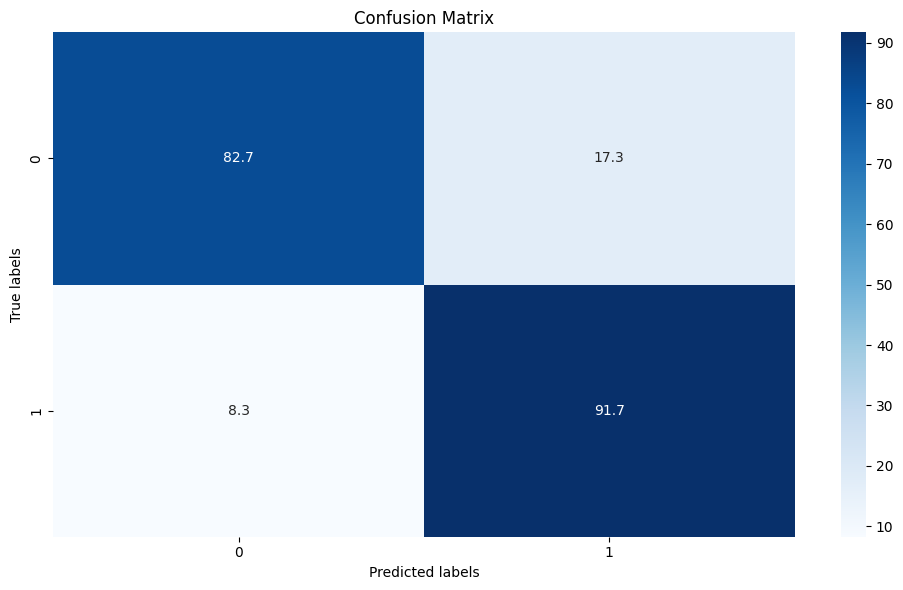

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred, normalize='true') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [24]:
import joblib

joblib.dump(pipeline, config.MODELFILE)


['C:\\Users\\victo\\Desktop\\Victor\\portifolio\\olist-sentiment-analysis\\src\\saved_models\\model.joblib']